In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from math import sqrt
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import percentileofscore
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import os
print(os.listdir("../input"))

['world-happiness-report-2019.csv']


In [2]:
df = pd.read_csv('../input/world-happiness-report-2019.csv')

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [5]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [6]:
df['Positive affect'].fillna(df['Positive affect'].mean(),inplace=True)
df['Negative affect'].fillna(df['Negative affect'].mean(),inplace=True)
df['Social support'].fillna(df['Social support'].mode(),inplace=True)
df['Freedom'].fillna(df['Freedom'].median(),inplace=True)
df['Corruption'].fillna(df['Corruption'].mean(),inplace=True)
df['Generosity'].fillna(df['Generosity'].median(),inplace=True)
df['Log of GDP\nper capita'].fillna(df['Log of GDP\nper capita'].mean(),inplace=True)
df['Healthy life\nexpectancy'].fillna(df['Healthy life\nexpectancy'].mean(),inplace=True)

In [7]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,78.500000,78.000000,78.000000,77.685897,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.743715,44.743715,44.915376,44.743715,41.747088,44.743715,43.450973,42.596191
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.750000,39.750000,38.750000,39.750000,39.750000,39.750000,39.750000,39.750000
50%,78.500000,78.500000,78.000000,78.000000,77.500000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.250000,116.250000,116.250000,116.250000,109.250000,116.250000,113.250000,111.250000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


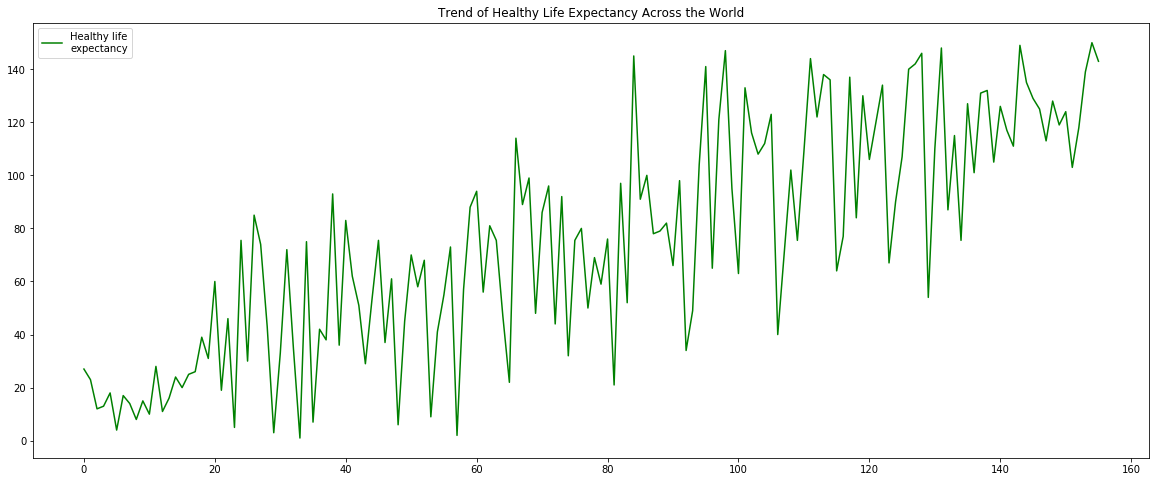

In [8]:
country_wise = df[['Country (region)', 'Healthy life\nexpectancy']]
country_wise.plot(kind = 'line',figsize=(20,8),color='g')
plt.title('Trend of Healthy Life Expectancy Across the World')
plt.show()

In [9]:
df.corr(method='pearson')

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.539362,0.489512,0.521598,0.819247,0.544642,0.186494,0.495912,0.801488,0.805928
SD of Ladder,0.539362,1.000000,0.085373,0.619211,0.595951,0.251834,0.254893,0.392119,0.622593,0.603447
Positive affect,0.489512,0.085373,1.000000,0.389697,0.384792,0.681770,0.205777,0.354877,0.291743,0.324578
Negative affect,0.521598,0.619211,0.389697,1.000000,0.619511,0.430241,0.157004,0.338226,0.523199,0.473442
Social support,0.819247,0.595951,0.384792,0.619511,1.000000,0.447187,0.116705,0.440741,0.760446,0.739960
Freedom,0.544642,0.251834,0.681770,0.430241,0.447187,1.000000,0.373821,0.489991,0.398620,0.411450
Corruption,0.186494,0.254893,0.205777,0.157004,0.116705,0.373821,1.000000,0.259616,0.188692,0.119435
Generosity,0.495912,0.392119,0.354877,0.338226,0.440741,0.489991,0.259616,1.000000,0.472473,0.419019
Log of GDP\nper capita,0.801488,0.622593,0.291743,0.523199,0.760446,0.398620,0.188692,0.472473,1.000000,0.827036
Healthy life\nexpectancy,0.805928,0.603447,0.324578,0.473442,0.739960,0.411450,0.119435,0.419019,0.827036,1.000000


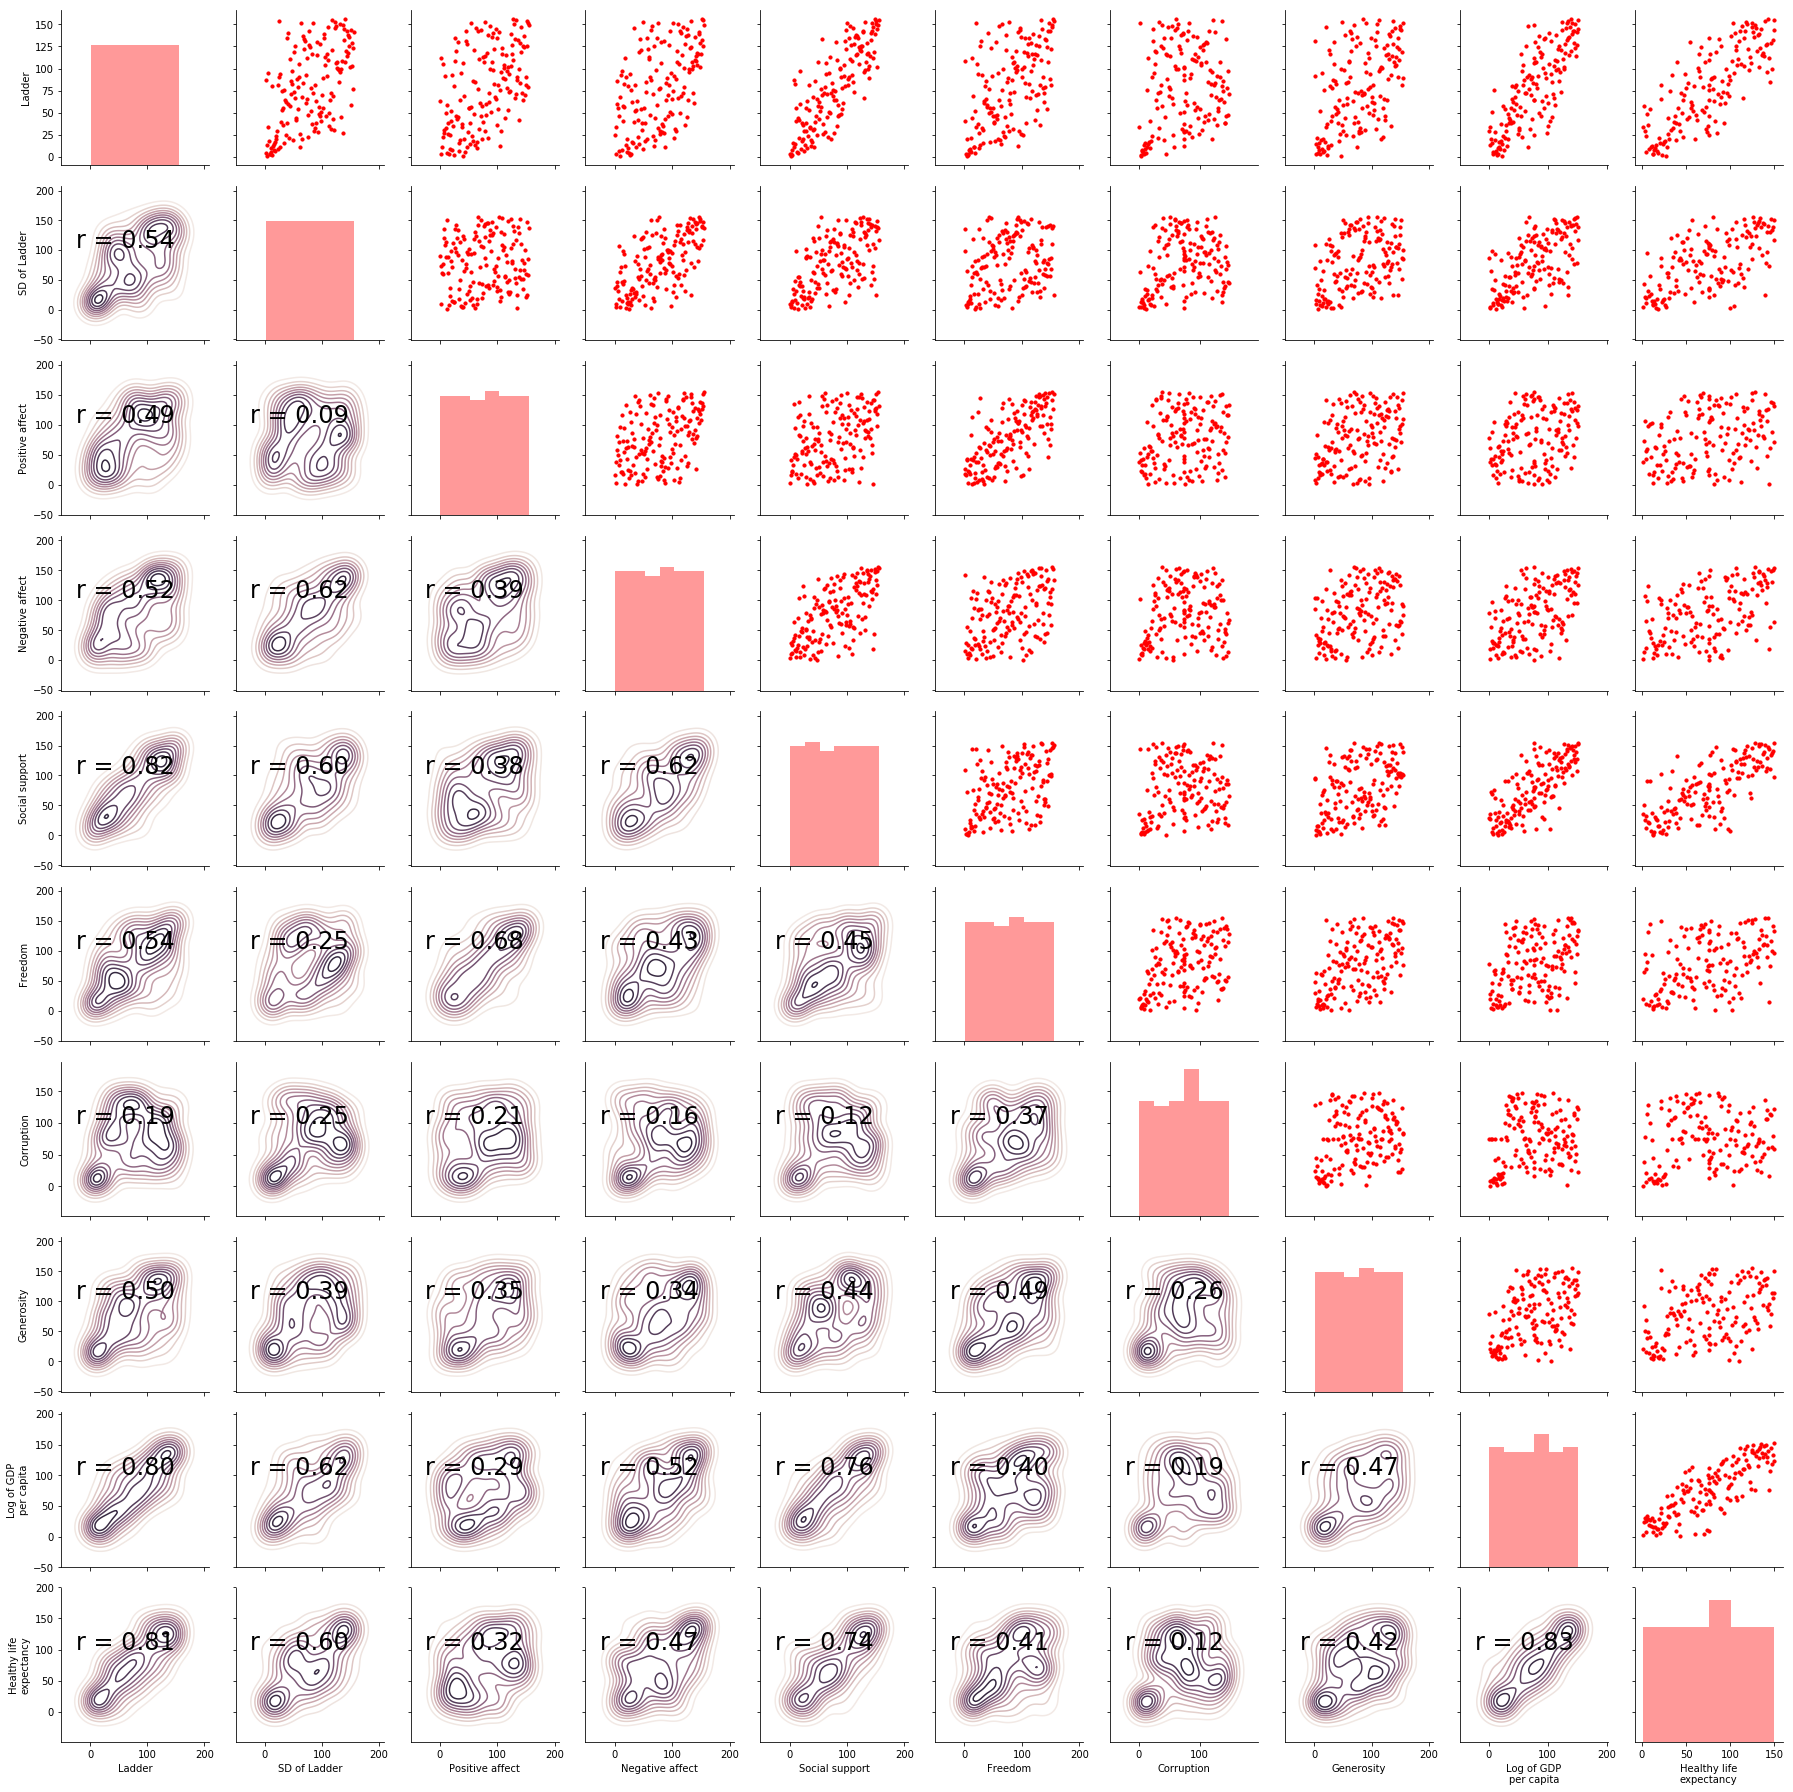

In [10]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

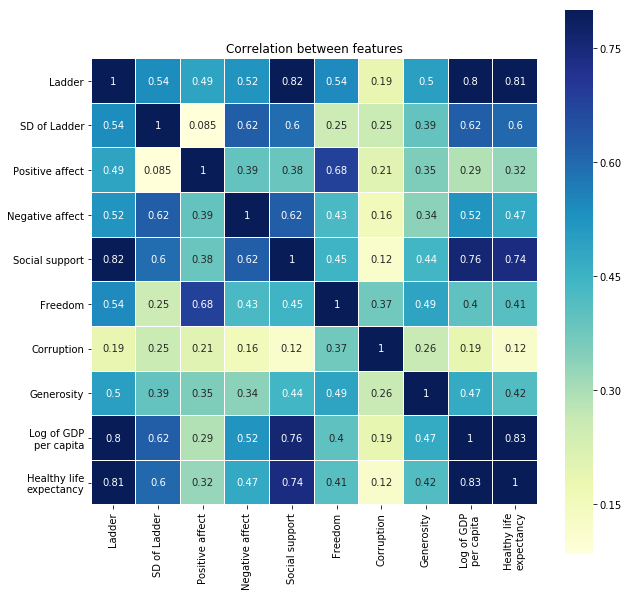

In [11]:
features = df.drop(['Corruption', 'Positive affect', 'Negative affect'], axis=1)

corr=df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [12]:
features = df.rename(columns={'Healthy life\nexpectancy': 'Healthy Life Exp', 'Log of GDP\nper capita': 'GDP Per Cap'})

features = features.drop('Country (region)', axis=1)
features = features.drop('Generosity', axis=1)
features.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,GDP Per Cap,Healthy Life Exp
0,1,4,41.0,10.0,2.0,5.0,4.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,12.0,18.0


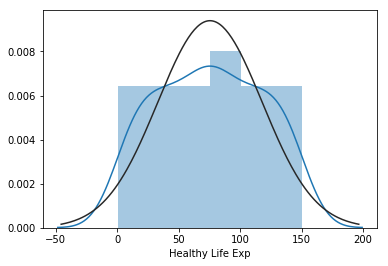

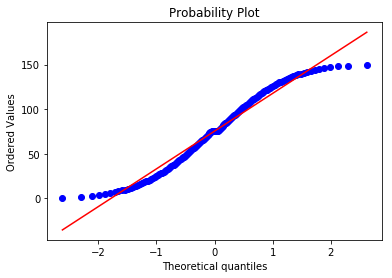

In [13]:
sns.distplot(features['Healthy Life Exp'], fit=norm);
fig = plt.figure()
res = stats.probplot(features['Healthy Life Exp'], plot=plt)

In [14]:
y = df['Healthy life\nexpectancy']
X = features.drop('Healthy Life Exp', axis=1)

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

from sklearn.linear_model import LinearRegression
regressor_normed = LinearRegression(normalize=True)
regressor_normed.fit(X_train, y_train)

y_pred = regressor_normed.predict(X_test)

from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:' , r2_score(y_test,y_pred))

MAE 16.242783983417798
MSE 375.99724128768065
RMSE 19.390648294672374
r2 score: 0.7550325788251723


Text(0.5, 1.0, 'LinearRegression')

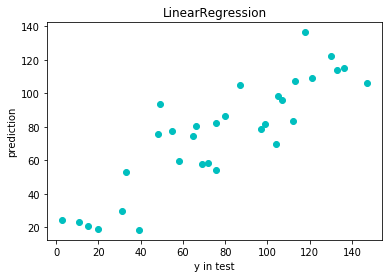

In [16]:
plt.scatter(y_test,y_pred,color='c')
plt.xlabel('y in test')
plt.ylabel('prediction')
plt.title('LinearRegression')

In [17]:
# model reduction using Ridge Regression

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
pred_train_ridge = rr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train, pred_train_ridge)))
print(r2_score(y_train, pred_train_ridge))

21.556606342105557
0.7516207475547958


In [18]:
pred_test_ridge = rr.predict(X_test)
print("MAE", metrics.mean_absolute_error(y_test, pred_test_ridge))
print("MSE", metrics.mean_squared_error(y_test, pred_test_ridge))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred_test_ridge)))
print('r2 score:' , r2_score(y_test, pred_test_ridge))

MAE 16.242783436796923
MSE 375.99721624366487
RMSE 19.390647648896746
r2 score: 0.7550325951416961


In [19]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)

pred_test_rf = rf.predict(X_test)

print("MAE", metrics.mean_absolute_error(y_test, pred_test_rf))
print("MSE", metrics.mean_squared_error(y_test, pred_test_rf))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred_test_rf)))
print('r2 score:' , r2_score(y_test,pred_test_rf))

MAE 12.73075
MSE 248.27736207812507
RMSE 15.756819541967378
r2 score: 0.8382438527578633
